In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import random

In [18]:
data = pd.read_csv("data_placement.csv")
data['status'].dtype
data['status'] = (data['status'] == "Placed")*1
data['workex'] = (data['workex'] == "Yes")*1
data['ssc_b'] = (data['ssc_b'] == "Central")*1
data['hsc_b'] = (data['hsc_b'] == "Central")*1
data['gender'] = (data['gender'] == "F")*1
data['specialisation'] = (data['specialisation'] == "Mkt&Fin")*1
df = pd.DataFrame(data)
df['salary'] = df['salary'].fillna(0)
print(df)


     sl_no  gender  ssc_p  ssc_b  ...  specialisation  mba_p status    salary
0        1       0  67.00      0  ...               0  58.80      1  270000.0
1        2       0  79.33      1  ...               1  66.28      1  200000.0
2        3       0  65.00      1  ...               1  57.80      1  250000.0
3        4       0  56.00      1  ...               0  59.43      0       0.0
4        5       0  85.80      1  ...               1  55.50      1  425000.0
..     ...     ...    ...    ...  ...             ...    ...    ...       ...
210    211       0  80.60      0  ...               1  74.49      1  400000.0
211    212       0  58.00      0  ...               1  53.62      1  275000.0
212    213       0  67.00      0  ...               1  69.72      1  295000.0
213    214       1  74.00      0  ...               0  60.23      1  204000.0
214    215       0  62.00      1  ...               0  60.22      0       0.0

[215 rows x 15 columns]


In [19]:
sns.set()
data.corr()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary
sl_no,1.000000,-0.074306,-0.078155,-0.027214,-0.085711,-0.116887,-0.088281,0.059151,0.063636,-0.046630,0.022327,-0.026859,0.002543
gender,-0.074306,1.000000,0.068969,0.019429,0.021334,0.065945,0.173217,-0.085153,-0.084294,-0.106160,0.300531,-0.090670,-0.143110
ssc_p,-0.078155,0.068969,1.000000,-0.116194,0.511472,-0.066996,0.538404,0.175675,0.261993,0.172536,0.388478,0.607889,0.538090
ssc_b,-0.027214,0.019429,-0.116194,1.000000,0.137013,0.605883,-0.038070,0.040744,0.018991,-0.051565,-0.083120,-0.037297,-0.034594
hsc_p,-0.085711,0.021334,0.511472,0.137013,1.000000,0.019548,0.434206,0.141025,0.245113,0.241630,0.354823,0.491228,0.452569
hsc_b,-0.116887,0.065945,-0.066996,0.605883,0.019548,1.000000,-0.067229,-0.038357,-0.039108,0.002232,-0.090201,-0.016945,-0.011544
degree_p,-0.088281,0.173217,0.538404,-0.038070,0.434206,-0.067229,1.000000,0.122648,0.224470,0.218286,0.402364,0.479861,0.408371
workex,0.059151,-0.085153,0.175675,0.040744,0.141025,-0.038357,0.122648,1.000000,0.056735,0.191174,0.168811,0.276060,0.298285
etest_p,0.063636,-0.084294,0.261993,0.018991,0.245113,-0.039108,0.224470,0.056735,1.000000,0.236315,0.218055,0.127639,0.186988
specialisation,-0.046630,-0.106160,0.172536,-0.051565,0.241630,0.002232,0.218286,0.191174,0.236315,1.000000,0.105728,0.250655,0.275766


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


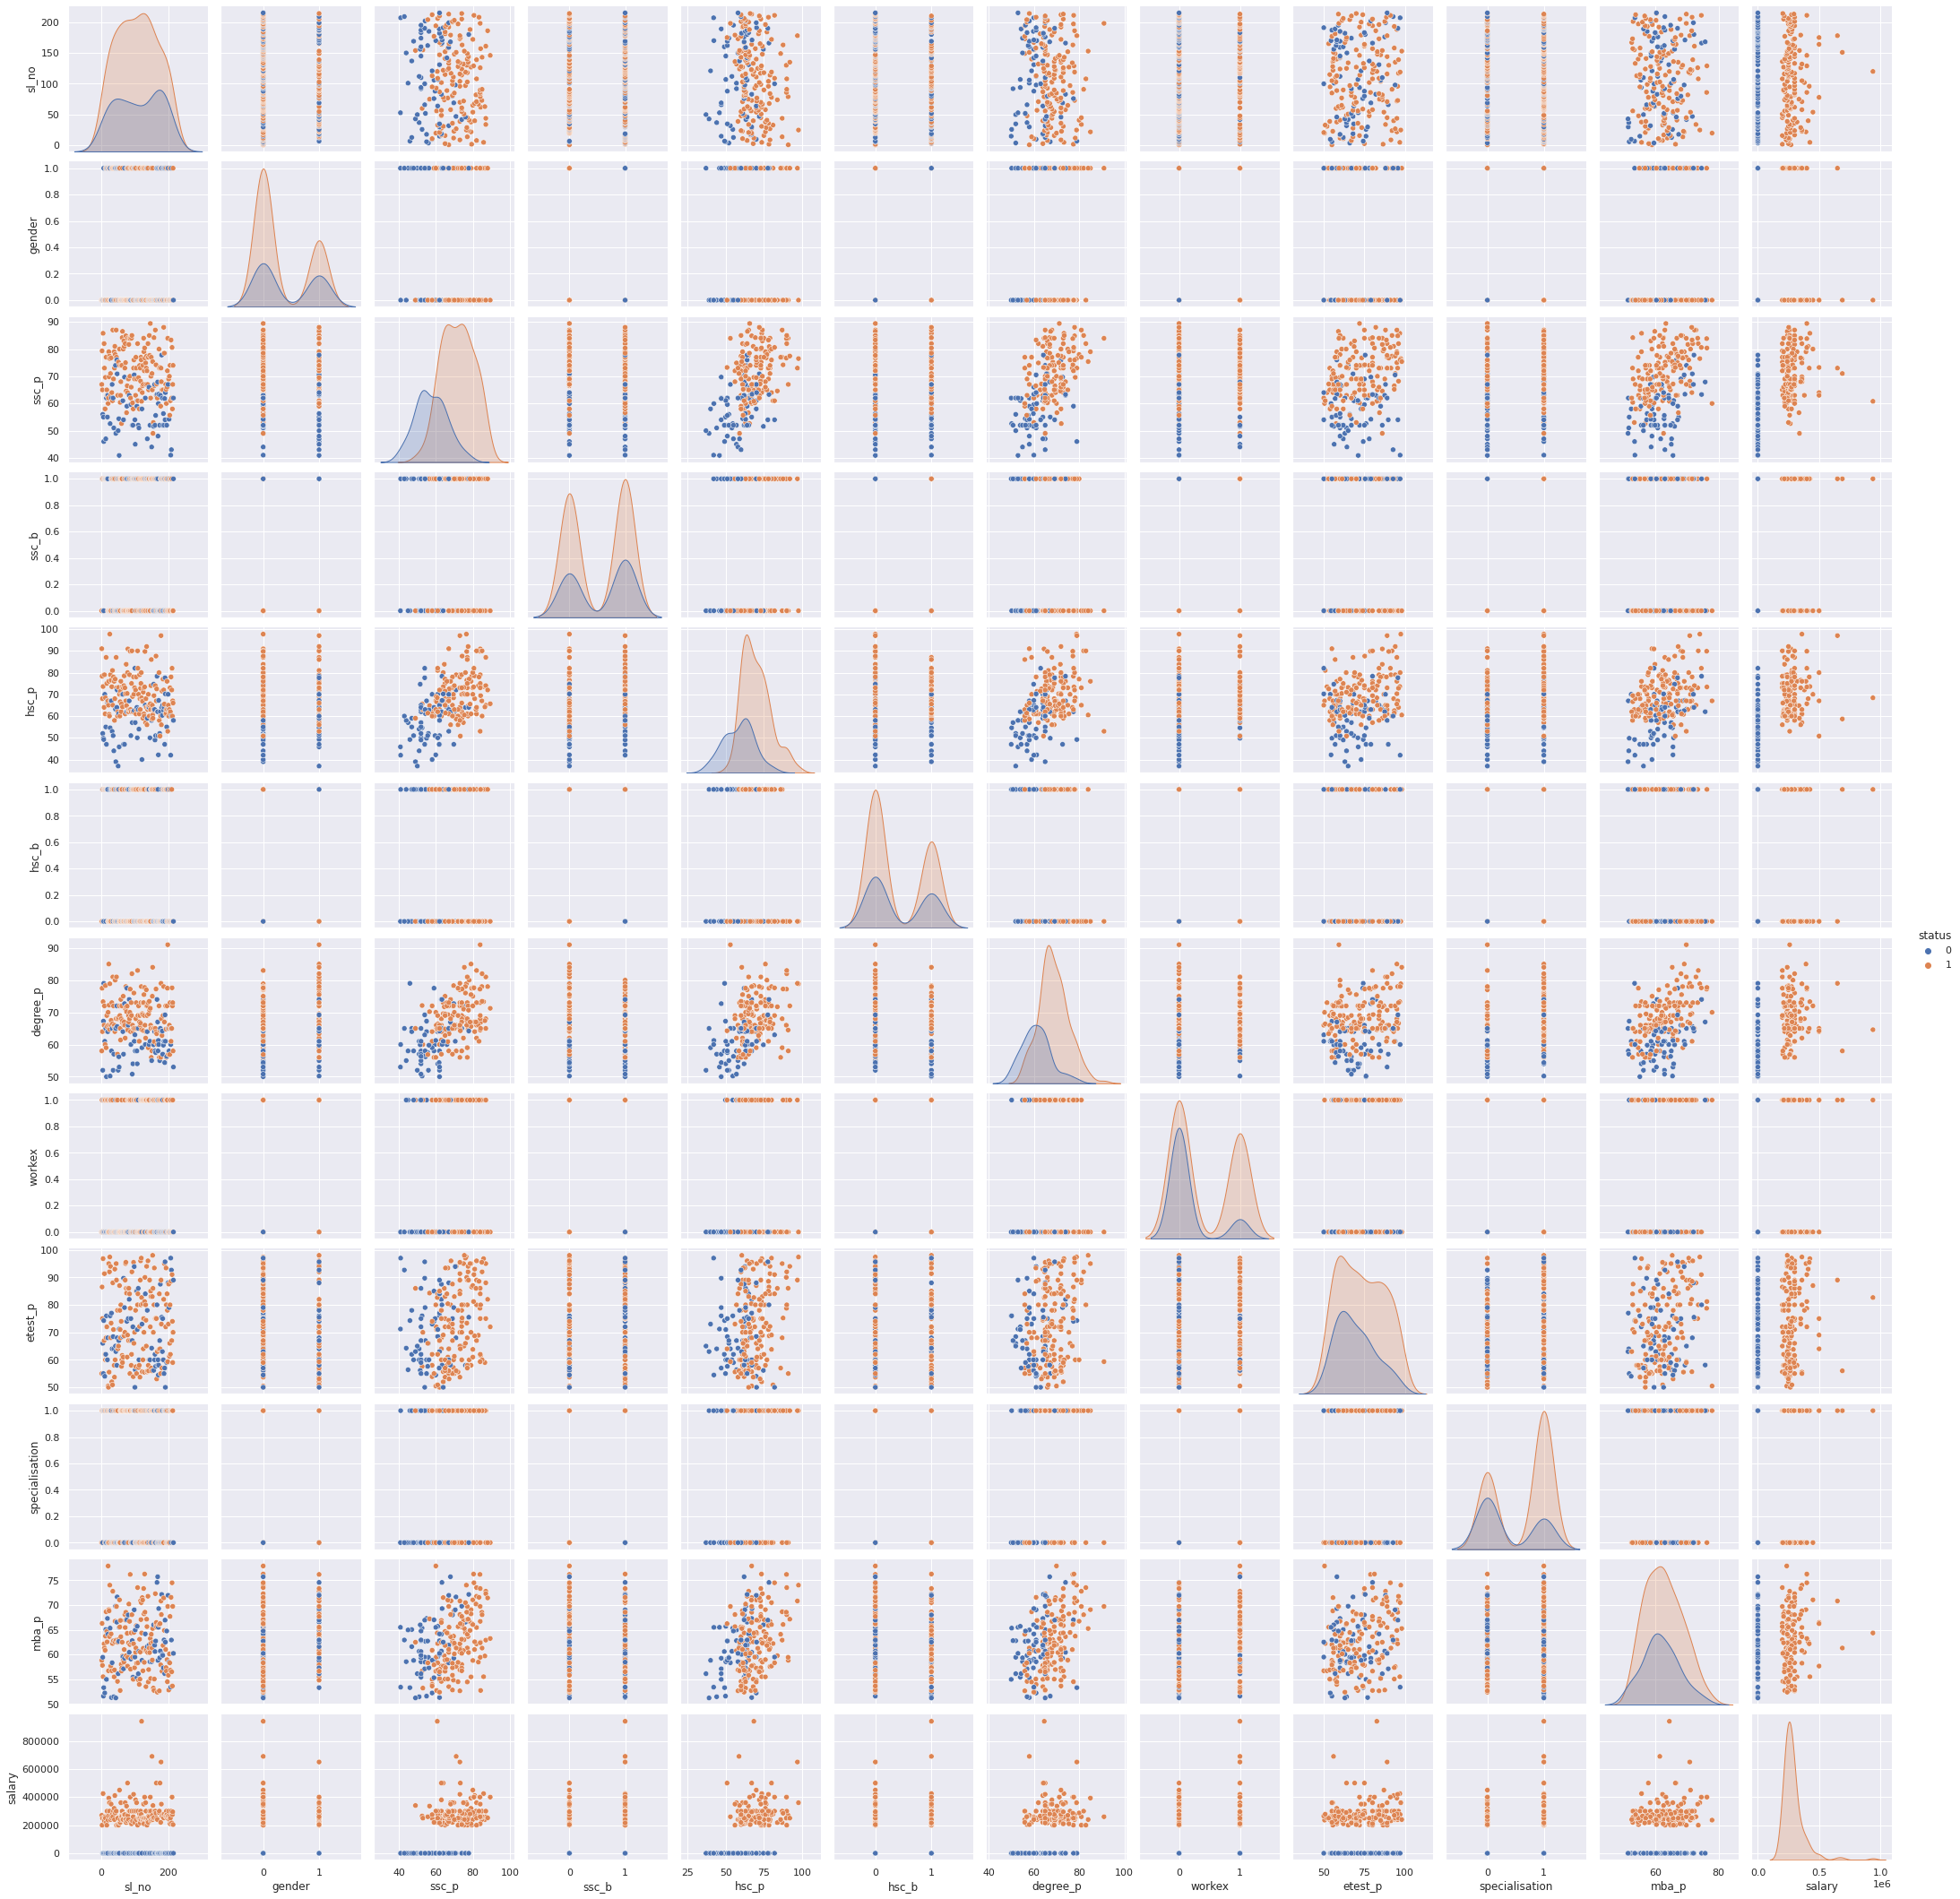

In [6]:

sns.pairplot(data,hue = 'status')

In [20]:
corr = data.corr()
corr[["status"]].sort_values(by = "status",ascending = False).style.background_gradient()


,status
status,1.000000
salary,0.865774
ssc_p,0.607889
hsc_p,0.491228
degree_p,0.479861
workex,0.276060
specialisation,0.250655
etest_p,0.127639
mba_p,0.076922
hsc_b,-0.016945


In [22]:
y = data["status"]
X = data[["gender","ssc_p","hsc_p","degree_p", "workex","etest_p","specialisation"]]
X2 = X.values
y2 = y.values
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 1/5, random_state = 0)

In [21]:
class LogisticRegressionS:
    
    #Sigmoid function
    def hyphotesis(self, X, thetha):
        z = np.dot(thetha, X.T)
        return 1/(1 + np.exp((-1) * (z))) - 0.0000001

    #Cost function
    def costFunction(self, X, y, thetha):
        yp = self.hyphotesis(X, thetha)
        return -(1/len(X)) * np.sum(y*np.log(yp) + (1-y)*np.log(1-yp))

    #Gradient Descent
    def gradientDescent(self, X, y, thetha, alpha, epochs):
        m = len(X)
        J = [self.costFunction(X, y, thetha)]
        for i in range(0, epochs):
            h = self.hyphotesis(X, thetha)
            for i in range(0, len(X.columns)):
                thetha[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
            J.append(self.costFunction(X, y, thetha))
        return J, thetha

    def predict(self, X, y, thetha, alpha, epochs):
        J, th = self.gradientDescent(X, y, thetha, alpha, epochs)
        h = self.hyphotesis(X, thetha)
        for i in range(len(h)):
            h[i] = 1 if h[i] >= 0.5 else 0
        y = list(y)
        acc = np.sum([y[i] == h[i] for i in range(len(y))]) / len(y)
        #print(y, h)
        return J, acc, h

    def predict2(self, X, y, thetha, alpha, epochs):
        J, th = self.gradientDescent(X, y, thetha, alpha, epochs)
        h = self.hyphotesis(X, thetha)
        for i in range(len(h)):
            h[i] = 1 if h[i] >= 0.5 else 0
        
        #print(y, h)
        return J, h

In [23]:
clf = LogisticRegression(random_state=0, max_iter=2000).fit(X_train, y_train)

idxs = np.random.randint(X2.shape[0], size=10)
instancias = X2[idxs,:]

In [24]:
y_pred = clf.predict(X_test)
print("Test")
for i in range(len(X_test)):
    print(f'Instancia {i}. Etiqueta real: {y_test[i]}. Etiqueta predicha: {y_pred[i]}')

Test
Instancia 0. Etiqueta real: 0. Etiqueta predicha: 1
Instancia 1. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 2. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 3. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 4. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 5. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 6. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 7. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 8. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 9. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 10. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 11. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 12. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 13. Etiqueta real: 1. Etiqueta predicha: 0
Instancia 14. Etiqueta real: 1. Etiqueta predicha: 0
Instancia 15. Etiqueta real: 1. Etiqueta predicha: 0
Instancia 16. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 17. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 18. Etiqueta real: 1. Etiqueta predicha: 

In [25]:
print("Mean accuracy Framework: ", clf.score(X, y))

Mean accuracy Framework:  0.8651162790697674


In [26]:
logR = LogisticRegressionS()
thetha = [0.5]*len(X.columns)
lr = 0.0001
iterations = 2000
#print(y)
J, acc, h = logR.predict(X, y, thetha, lr, iterations)
print("Mean accuracy By Hand: ", acc)

Mean accuracy By Hand:  0.772093023255814


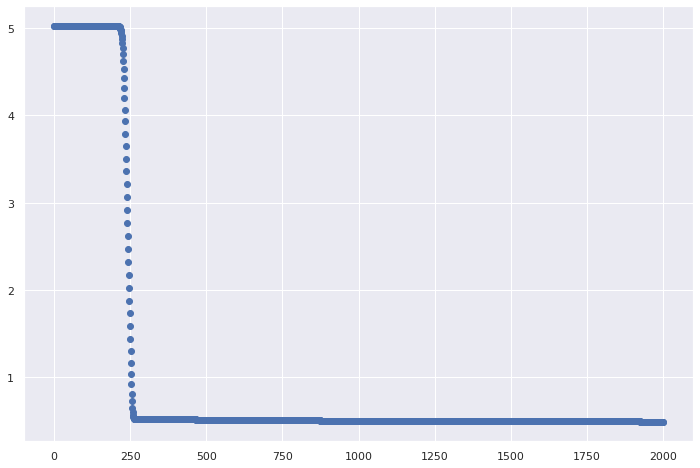

In [27]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
#plt.show()

In [28]:
answers = []
yH = [0]

answers.append(int(input("Your gender M(0) F(1): ")))

answers.append(int(input("Secondary Education Percentage: ")))

answers.append(int(input("Higher Secondary Education Percentage: ")))

answers.append(int(input("Degree Percentage: ")))

answers.append(int(input("Work Experience Yes(1) No(0): ")))

answers.append(int(input("Employability Test Percentage: ")))

answers.append(int(input("Specialisation Mkt&Fin(1) Mkt&HR(0): ")))

Your gender M(0) F(1): 0
Secondary Education Percentage: 89
Higher Secondary Education Percentage: 70
Degree Percentage: 67
Work Experience Yes(1) No(0): 0
Employability Test Percentage: 90
Specialisation Mkt&Fin(1) Mkt&HR(0): 1


In [29]:
arr = []
arr.append(answers)
dataframe=pd.DataFrame(arr, columns=[["gender","ssc_p","hsc_p","degree_p", "workex","etest_p","specialisation"]]) 
line = pd.DataFrame({"gender": answers[0], "ssc_p": answers[1], "hsc_p": answers[2], "degree_p": answers[3], "workex":answers[4], "etest_p": answers[5], "specialisation": answers[6] }, index=[215])
X = X.append(line, ignore_index=False)
X = X.sort_index().reset_index(drop=True)

y.loc[-1] = int(yH[0])
y.index = y.index + 1  # shifting index
y = y.sort_index()  # sorting by index

In [30]:
y_pred = clf.predict(dataframe)
print("predicted by Framework: ", y_pred)


J, h = logR.predict2(X,y, thetha, lr, iterations)
print("predicted by Hand: ", h[215])


predicted by Framework:  [1]
predicted by Hand:  1.0
